## TITANIC DATASET
1. Class - Categorical(1,2,3)
The other columns are Continuous variables
2. Alcohol
3. Malic acid
4. Ash
5. Alcalinity of ash
6. Magnesium
7. Total phenols
8. Flavanoids
9. Nonflavanoid phenols
10. Proanthocyanins
11. Color intensity
12. Hue
13. diluted wines
14. Proline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
df = pd.read_csv("D:/STUDIES/DATA TRAINED/DATASETS/winedataset.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
df.shape

(178, 14)

In [7]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

### SUMMARY STATISTICS

In [5]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### There are no outliers since there is no huge difference between mean and 2nd quartile

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [11]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

#### No null values

### DATA VISUALIZATIONS

In [12]:
df_corr = df.corr()
df_corr

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


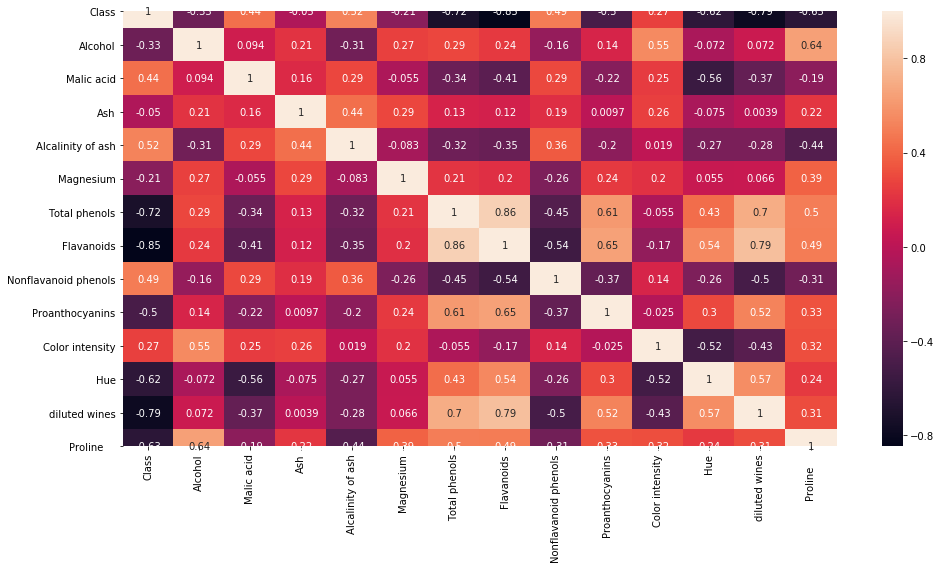

In [28]:
plt.figure(figsize=(16,8))
sns.heatmap(df_corr,annot = True)

1. Malic acid, Alcalinity of ash, Nonflavanoid phenols, Color intensity have positive correlation with Class
2. Hue, diluted wines, Proline, Flavanoids, Hue, Proanthocuanins, Total phenols have high negative correlation with Class
3. Ash has no significant correlation with Class

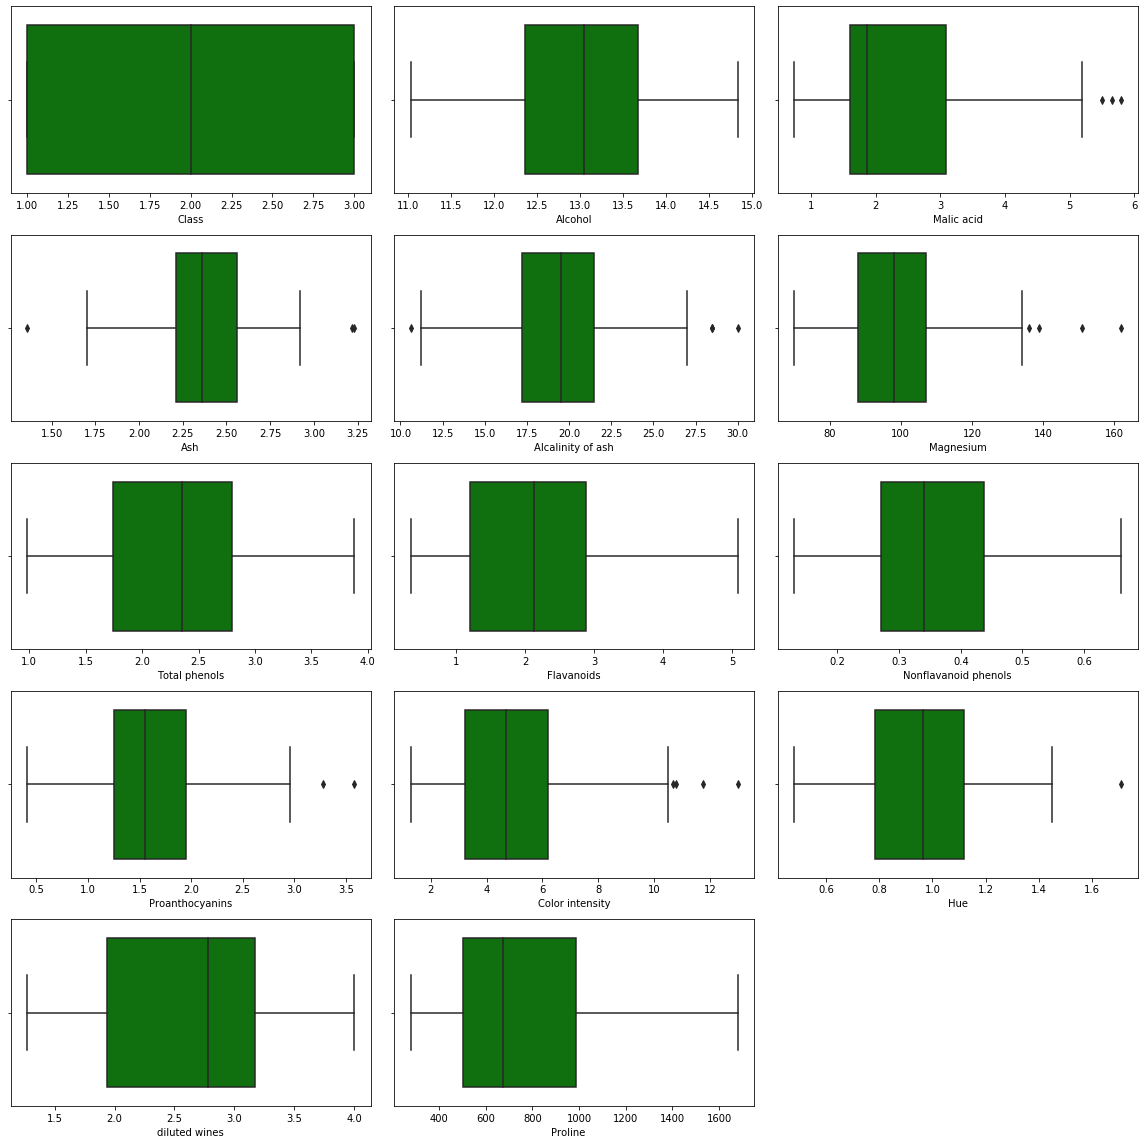

In [23]:
collist = list(df.columns.values)
plt.figure(figsize=(16,16))
for i in range(14):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

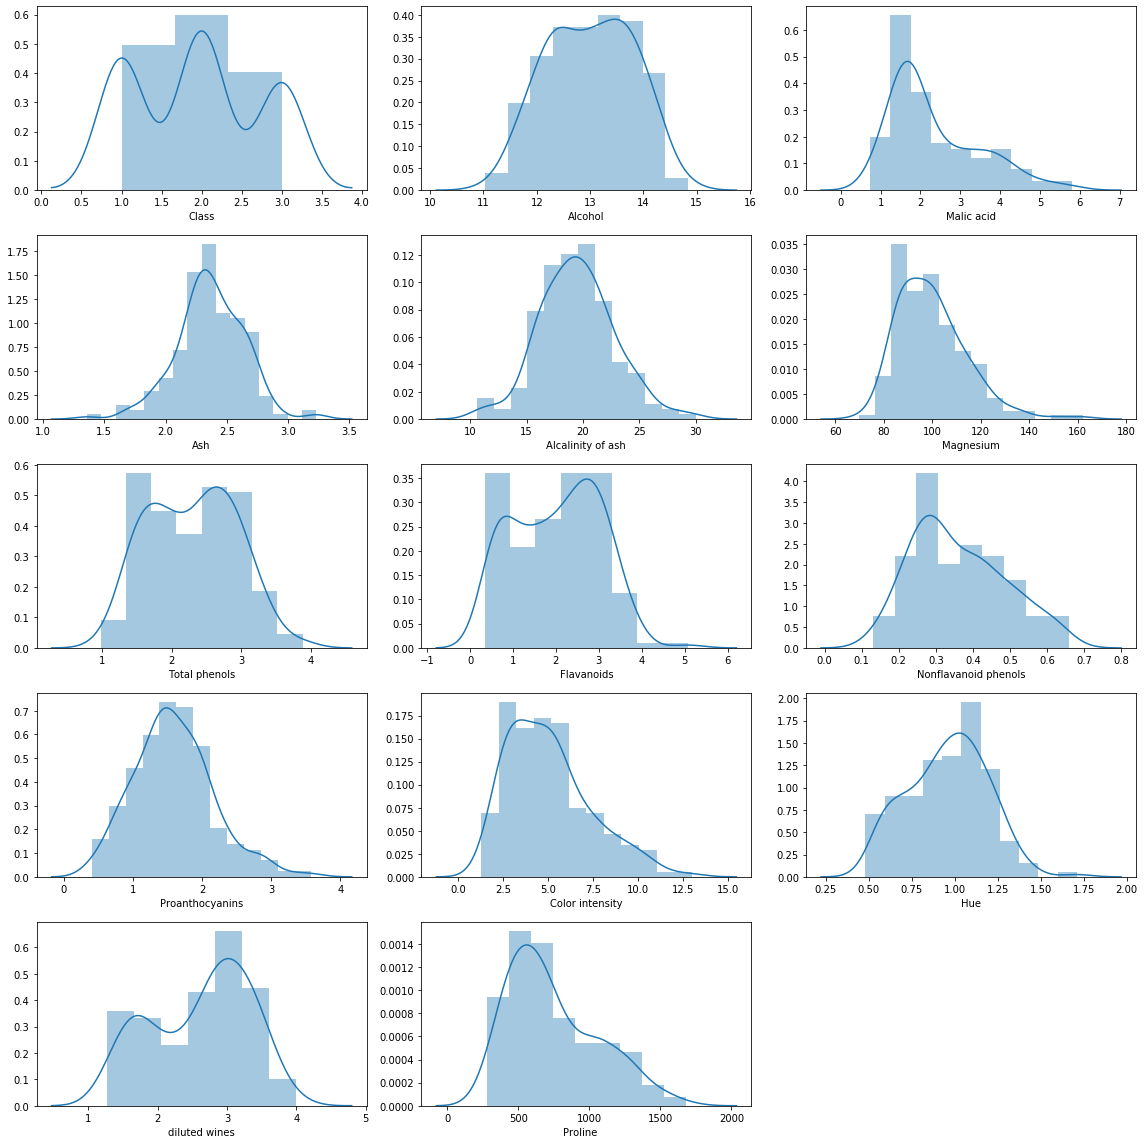

In [25]:
collist = list(df.columns.values)
plt.figure(figsize=(16,16))
for i in range(14):
    plt.subplot(5,3,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

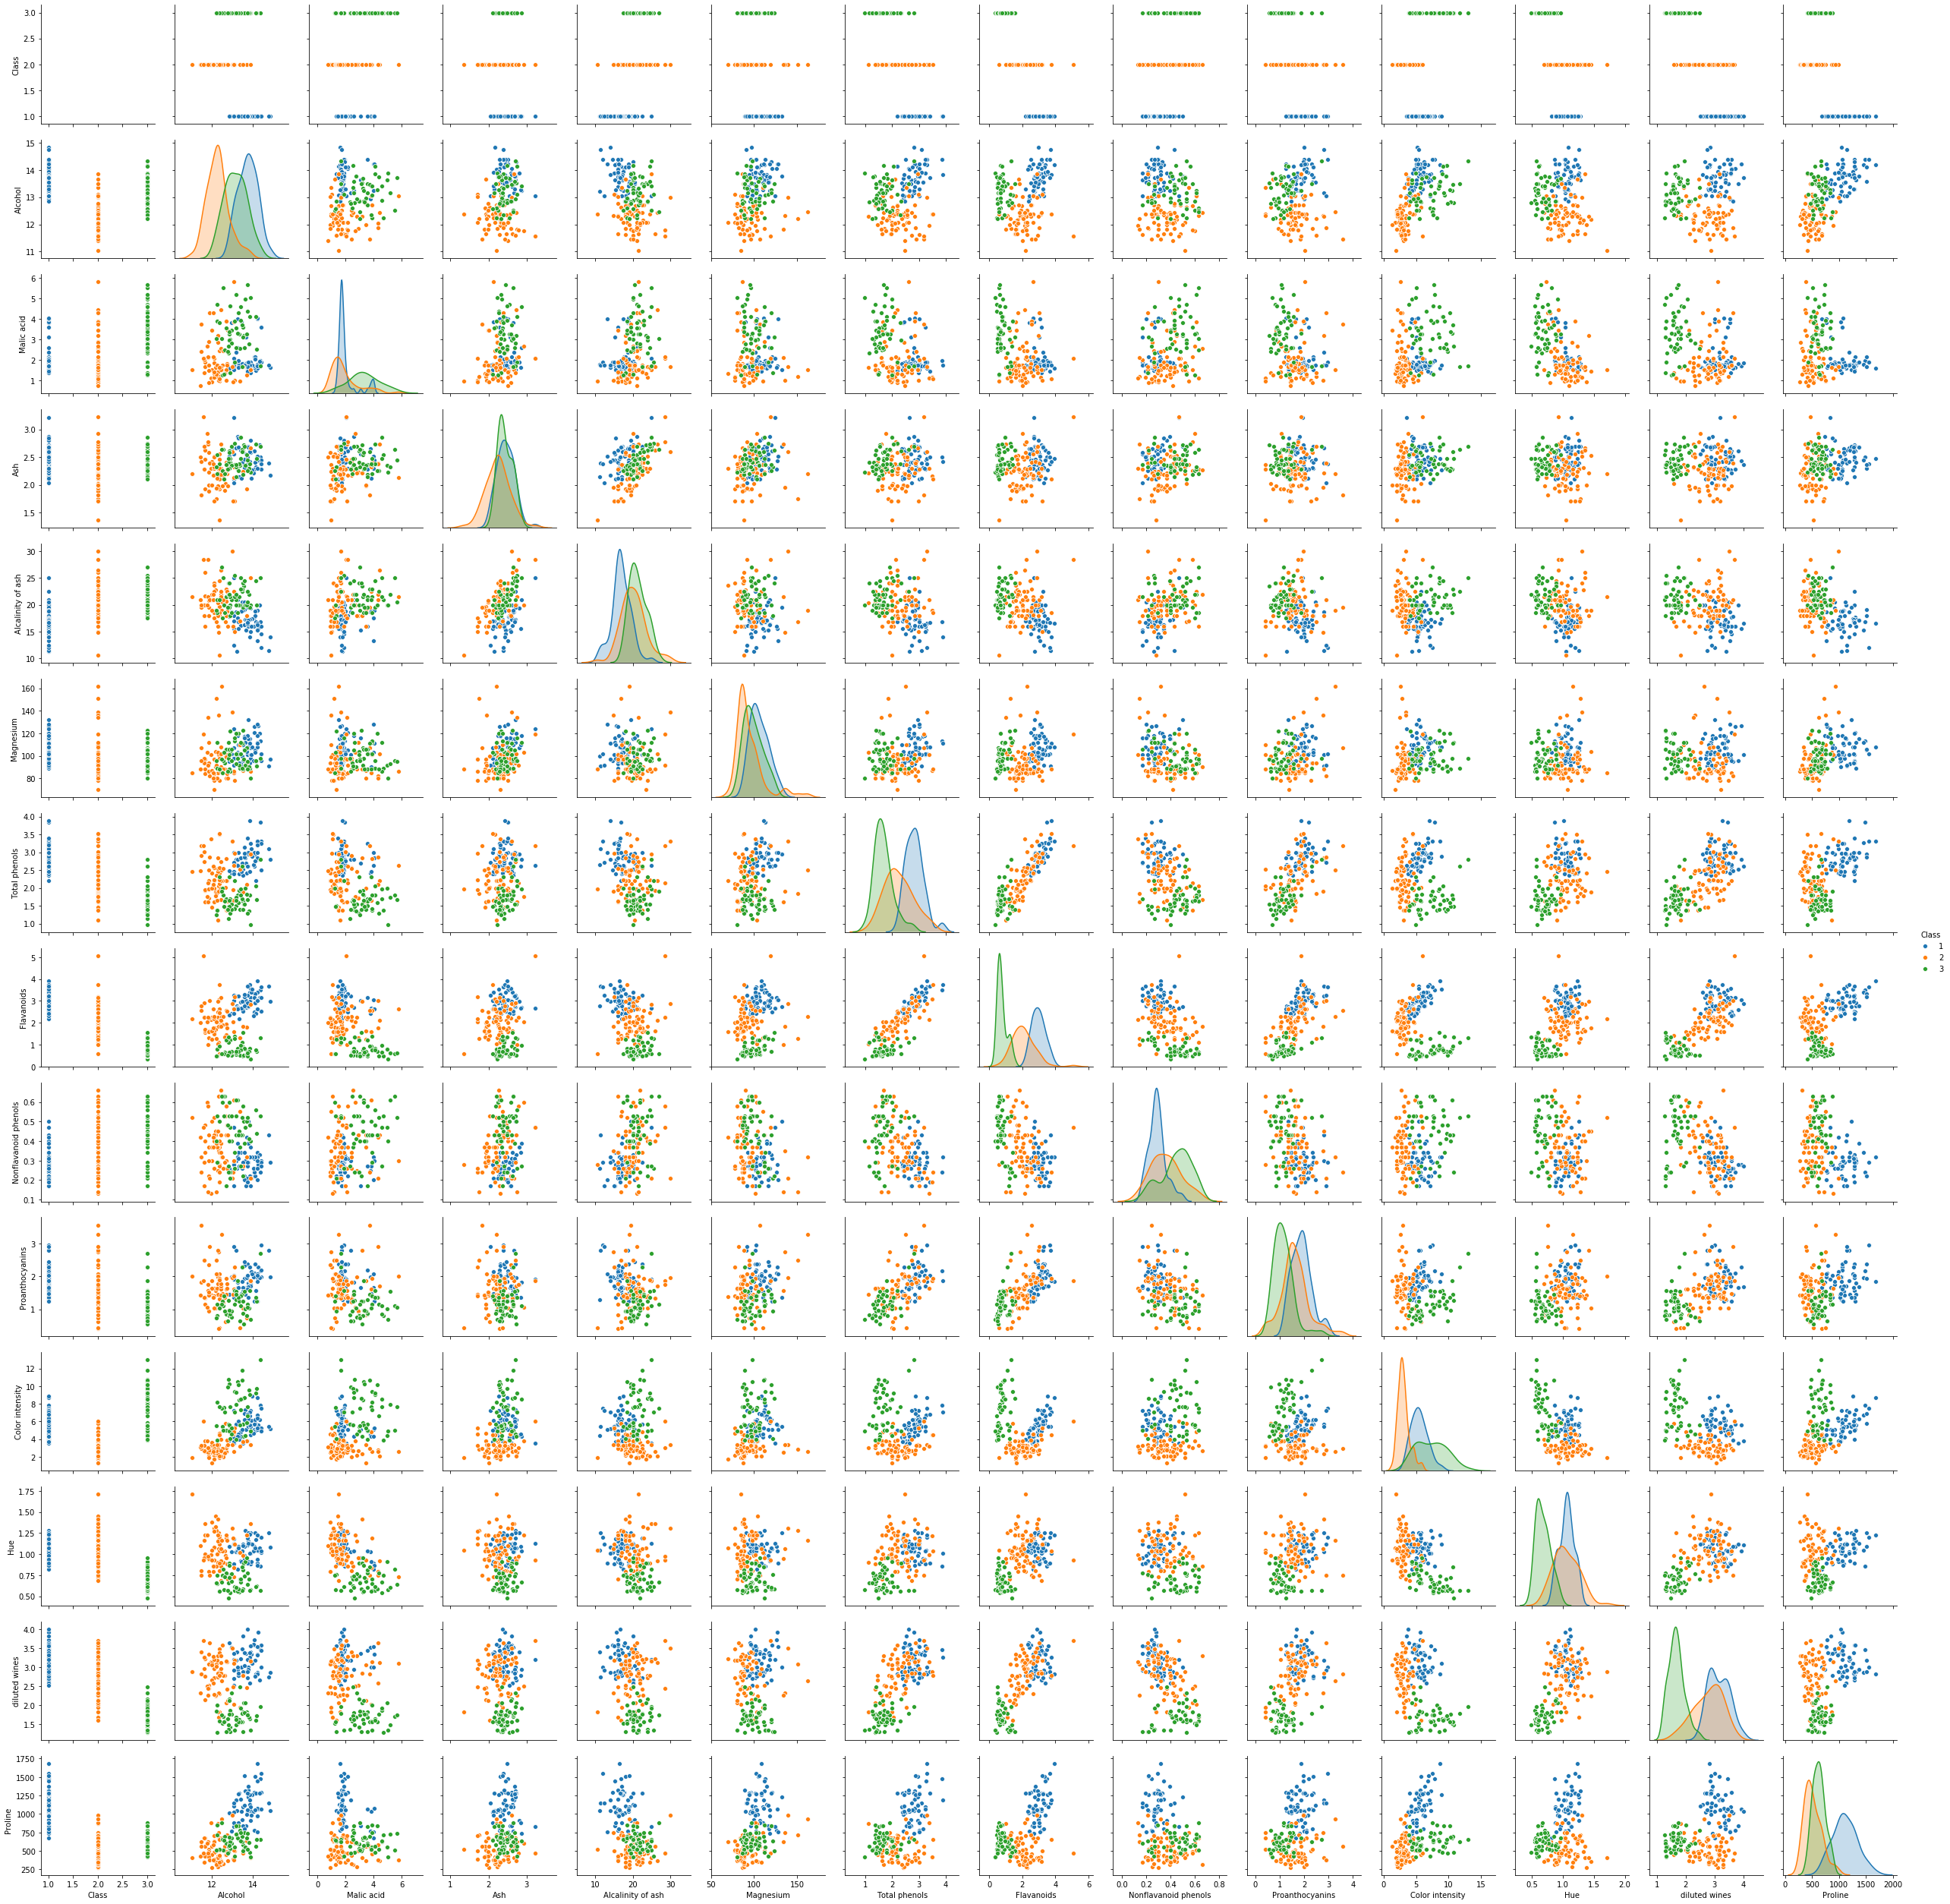

In [27]:
sns.pairplot(df, hue = 'Class')

### MODEL DEVELOPMENT

In [54]:
x = df.drop(['Class','Ash'], axis=1)
y = pd.DataFrame(df.iloc[:,:1])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
sc = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=i,test_size=0.30)
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [57]:
log.fit(x_train,y_train)
pred = log.predict(x_test)

print("Accuracy score: " , accuracy_score(y_test, pred))
print("Confusion matrix: \n", confusion_matrix(y_test, pred))
print("Classification report: \n" + classification_report(y_test, pred))

Accuracy score:  0.9444444444444444
Confusion matrix: 
 [[20  0  0]
 [ 3 21  0]
 [ 0  0 10]]
Classification report: 
              precision    recall  f1-score   support

           1       0.87      1.00      0.93        20
           2       1.00      0.88      0.93        24
           3       1.00      1.00      1.00        10

    accuracy                           0.94        54
   macro avg       0.96      0.96      0.95        54
weighted avg       0.95      0.94      0.94        54



In [61]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)

In [62]:
dec.fit(x_train, y_train)
pred = dec.predict(x_test)

print("Accuracy score: ", accuracy_score(y_test, pred))
print("Confusion matrix: ", confusion_matrix(y_test, pred))
print("Classification report: ",classification_report(y_test, pred))

Accuracy score:  0.9814814814814815
Confusion matrix:  [[20  0  0]
 [ 1 23  0]
 [ 0  0 10]]
Classification report:                precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        10

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



In [63]:
from sklearn.svm import SVC
svc = SVC(C= 10000, kernel = 'rbf', degree = 3)

In [67]:
svc.fit(x_train, y_train)
pred = dec.predict(x_test)

print("Accuracy score: ", accuracy_score(y_test, pred))
print("Confusion matrix: ", confusion_matrix(y_test, pred))
print("Classification report: ",classification_report(y_test, pred))

Accuracy score:  0.9814814814814815
Confusion matrix:  [[20  0  0]
 [ 1 23  0]
 [ 0  0 10]]
Classification report:                precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        10

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



### BOTH SVC and DECISION TREE HAVE THE SAME ACCURACY

In [68]:
import joblib
joblib.dump(dec,"WineDataset.pkl")

['WineDataset.pkl']